In [16]:
import napari_stress
import vedo
import napari
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
import numpy as np
import pandas as pd
import os
import skimage.io
from napari_stress._spherical_harmonics import spherical_harmonics_napari
from napari_stress import measurements, approximation
from enum import Enum
from napari_stress._spherical_harmonics.spherical_harmonics import shtools_spherical_harmonics_expansion
from napari_stress._spherical_harmonics.spherical_harmonics import stress_spherical_harmonics_expansion

In [17]:
import pandas as pd
def open_Excel_data(path):
    file = open(r"%s" % path, 'rb')
    data = pd.read_excel(file, sheet_name = 'data')
    return (data) 

def open_Excel_info(path):
    file = open(r"%s" % path, 'rb')
    data = pd.read_excel(file, sheet_name = 'info')
    return (data) 

In [18]:
viewer = napari.Viewer(ndisplay=3)

In [19]:
num_droplet = 13

DATA_ROOT = os.path.join("C:\\","Users","Heloise","Documents","Data","IgG","NoResonant","%s" %num_droplet)
file_name_recon = '%s_reconstruction.xlsx' %(num_droplet)

excel_file_recon = '%s/%s' %(DATA_ROOT, file_name_recon)

data = open_Excel_data(excel_file_recon)
info = open_Excel_info(excel_file_recon)


In [20]:
# Config

#utiliser pixel_size
#voxelsize = read_tiff_voxel_size(r"C:\Users\Heloise\Documents\Manip\Exemple\dec10_median.tif")
target_voxelsize = info['target_voxel_size'][0]



#Voxel size in µm
vsz = 0.1579
vsy = 0.1756
vsx = 0.1756
target_voxelsize = 0.1756   #microns

voxelsize = np.asarray([vsz, vsx, vsy])
scaling_factors = voxelsize / target_voxelsize


In [21]:
target_voxelsize = info['target_voxel_size'][0]
scale = np.asarray([target_voxelsize] * 3) 

#actine = skimage.io.imread(os.path.join(DATA_ROOT, 'actine.tif' )) #pour voir actine 
Dec = skimage.io.imread(os.path.join(DATA_ROOT, 'Dec10_median.tif' ))

viewer.add_image(Dec, name='deconvoluted_data1', scale = voxelsize)
#viewer.add_image(actine, name='actine', scale = voxelsize, colormap ="red")

<Image layer 'actine' at 0x130c106d400>

In [22]:
#convert the coordinates to the voxel size

data_res = data
data_res[0] = data_res[0]*target_voxelsize
data_res[1] = data_res[1]*target_voxelsize
data_res[2] = data_res[2]*target_voxelsize
#data_res = pd.DataFrame(data_res).to_numpy() 

viewer.add_points(data_res, size = 0.2, edge_color = "blue", name='Raw_rescale')  
#print(data_res)

<Points layer 'Raw_rescale' at 0x130b56b8820>

In [118]:
#Optionnel : si des points sont aberrants et à supprimer (mais à retravailler)

indices_a_supprimer = [944, 663, 1116,1135,1155,1167, 1084]
data_res = data_res.drop(indices_a_supprimer, axis=0)
data_res = data_res.reset_index(drop=True)

In [7]:
 viewer.add_points(data_res, size = 0.2, edge_color = "blue", name='Raw_rescale')  

<Points layer 'Raw_rescale [1]' at 0x1a2dcd4d820>

In [23]:
#Pour voir le fit par HS au mode 0

class spherical_harmonics_methods(Enum):
    """Available methods for spherical harmonics expansion."""

    shtools = {'function': shtools_spherical_harmonics_expansion}
    stress = {'function': stress_spherical_harmonics_expansion}

class expansion_types(Enum):
    """Available coordinate systems for spherical harmonics expansion."""
    cartesian = 'cartesian'
    radial = 'radial'

'''
max_degree = 0
#data = pd.DataFrame(data).to_numpy() 

data_res_tab = pd.DataFrame(data_res).to_numpy()

#remove the .points() for csv file
fitted_points_mode0 = napari_stress.fit_spherical_harmonics(data_res_tab, max_degree=max_degree, expansion_type = expansion_types.radial)
fitted_points_mode0[1]['size'] = 0.1
fitted_points_mode0[1]['face_color'] = 'yellow'
viewer.add_points(fitted_points_mode0[0], **fitted_points_mode0[1])

<Points layer 'Points' at 0x130c2393910>

In [24]:
#Pour voir le fit par HS au mode choisi

max_degree = 5
#data = pd.DataFrame(data).to_numpy() 

data_res_tab = pd.DataFrame(data_res).to_numpy()

#remove the .points() for csv file
fitted_points = napari_stress.fit_spherical_harmonics(data_res_tab, max_degree=max_degree, expansion_type = expansion_types.cartesian)
fitted_points[1]['size'] = 0.2
#fitted_points[1]['face_color'] = 'red'
viewer.add_points(fitted_points[0], **fitted_points[1])

<Points layer 'Points [1]' at 0x130c2a4e970>

In [33]:
# Configuration des paramètres par défaut
import matplotlib as mpl

mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.titlecolor'] = 'white'
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['font.size'] = 10
mpl.rcParams['font.family'] = 'sans-serif'  # Choisir une police adaptée

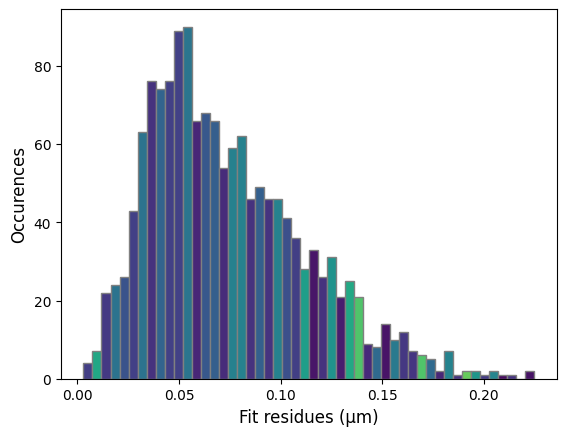

In [11]:
#la couleur des points devrait dépendre de l'erreur du fit par HS mais à retravailler 
errors = fitted_points[1]['features']['error']
err_min = errors.min()
err_max = errors.max()

norm_err = Normalize(vmin=err_min, vmax=err_max)

cmap = mpl.cm.viridis
color_err = cmap(norm_err(errors))

fig, ax = plt.subplots()

hist, bins = np.histogram(errors, bins=50)

for i in range(len(bins) - 1):
    plt.bar(bins[i], hist[i], width=np.diff(bins)[i], color=color_err[i], edgecolor='grey')

#ax.xaxis.set_ticks(range(max_degree+1)) 
plt.xlabel('Fit residues (µm)')
plt.ylabel('Occurences')
plt.show()

In [25]:
n_quadrature_point = 2000
coefficients = fitted_points[1]['metadata']['spherical_harmonics_coefficients']
quadrature_points, lebedev_fit = napari_stress.lebedev_quadrature(coefficients=coefficients, number_of_quadrature_points=n_quadrature_point, use_minimal_point_set = False )

In [26]:
print(len(quadrature_points))

2030


In [27]:
viewer.add_points(quadrature_points, size = 0.1, face_color='white', name='lebedev')  


<Points layer 'lebedev' at 0x130c425c460>

In [28]:
manifold_droplet = napari_stress.create_manifold(quadrature_points, lebedev_fit = lebedev_fit, max_degree=max_degree)

In [29]:
#Gauss-Bonnet 
from napari_stress import measurements

gauss_bonnet_err, gauss_bonnet_rel_err = measurements.gauss_bonnet_test(manifold_droplet)

print(gauss_bonnet_rel_err)

6.163208182747081e-14


In [30]:
from napari_stress import measurements, approximation
mean_curvature, H0_arithmetic, H0_surface = measurements.calculate_mean_curvature_on_manifold(manifold_droplet)

In [31]:
#map de couleur pour plotter la curvature
cmap = mpl.cm.coolwarm
curv_min = mean_curvature.min()
curv_max = mean_curvature.max()


norm = Normalize(vmin=curv_min, vmax=curv_max)
color_palette = cmap(norm(mean_curvature))

viewer.add_points(quadrature_points, size = 0.5, face_color=color_palette, edge_color = color_palette  ,name='curvature', blending = 'opaque') 


<Points layer 'curvature' at 0x130c440c280>

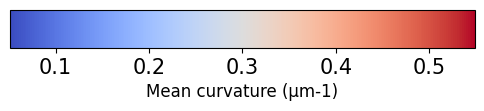

In [38]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.coolwarm
norm = mpl.colors.Normalize(curv_min, curv_max)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label='Mean curvature (µm-1)')

ax.tick_params (labelsize=15, color ="black")
ax.patch.set_facecolor('black')
ax.patch.set_facecolor('#ababab')

new_DATA_ROOT = DATA_ROOT.replace("\\", "/")
#plt.savefig("%s/scale_curvature_1_mode%d.png" %(new_DATA_ROOT, max_degree), facecolor=fig.get_facecolor())

In [20]:
print(H0_surface, H0_arithmetic)

0.20906108811382842 0.20974883587061185


In [39]:
#Measure stress 
gamma = 1.5

stress = 2 * gamma * (mean_curvature - H0_surface)

print(len(stress))

2030


In [31]:
#Map de couleur pour plotter les stress
cmap = mpl.cm.magma
stress_min = stress.min()
stress_max = stress.max()


norm = Normalize(vmin=stress_min, vmax=stress_max)
color_palette = cmap(norm(stress))

viewer.add_points(quadrature_points, size = 0.5, face_color=color_palette, edge_color = color_palette, name='stress', blending = 'opaque') 


<Points layer 'stress [1]' at 0x1a2dd0e1d30>

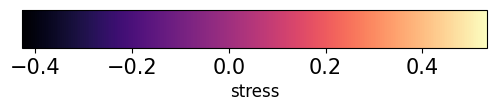

In [34]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.magma
norm = mpl.colors.Normalize(stress_min, stress_max)
ax.tick_params (labelsize=15, color ="black")

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label='stress')

new_DATA_ROOT = DATA_ROOT.replace("\\", "/")
#plt.savefig("%s/scale_stress_1_mode%d.png" %(new_DATA_ROOT, max_degree), facecolor=fig.get_facecolor())

In [40]:
file_name = '%s_data_mode%d.xlsx' %(num_droplet, max_degree)
saving_path = DATA_ROOT.replace("\\", "/")
excel_file = '%s/%s' %(saving_path, file_name)


name_info = ['max_degree', 'number of lbdv points','Gauss_Bonnet_error','Gauss_Bonnet_rel_error', 'H0_surface','H0_arithmetic', 'gamma']
info = [max_degree, len(quadrature_points), gauss_bonnet_err, gauss_bonnet_rel_err, H0_surface, H0_arithmetic, gamma]

data_curvature = {nom: [valeur] for nom, valeur in zip(name_info, info)}

df1 = pd.DataFrame(mean_curvature)
df2 = pd.DataFrame(data_curvature)
df3 = pd.DataFrame(stress)

writer = pd.ExcelWriter(excel_file)

# Écrire chaque DataFrame dans une feuille différente
df1.to_excel(writer, sheet_name='mean curvature', index=False)
df2.to_excel(writer, sheet_name='global curvature', index=False)
df3.to_excel(writer, sheet_name = 'anisotropic stress', index = False)

# Fermer le writer
writer.save()
writer.close()

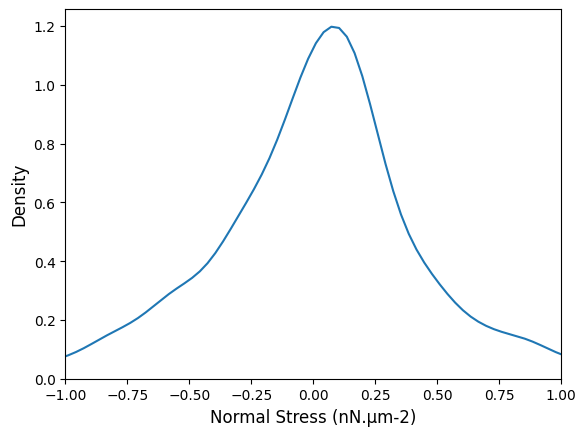

In [162]:
from scipy import stats
import seaborn as sns

fig, ax = plt.subplots()

sns.kdeplot(data=stress, bw_adjust = 0.75)

ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
plt.tick_params(axis='y', colors='black')
plt.tick_params(axis='x', colors='black')
plt.xlim(-1,1)
#ax.xaxis.set_ticks(range(max_degree+1)) 
plt.xlabel('Normal Stress (nN.µm-2)')
fig.patch.set_facecolor('white')
ax.patch.set_facecolor('white')
#plt.savefig("C:/Users/Heloise/Documents/Manip/Confocal/20230901/256_700/%s/Density_stress_1_mode%d.png" %(num_droplet, max_degree), facecolor=fig.get_facecolor())
plt.show()



In [38]:
import napari_process_points_and_surfaces as nppas


reconstructed_surface = nppas.reconstruct_surface_from_pointcloud(quadrature_points,number_of_sampling_voxels=20, point_influence_radius=1)

viewer.add_surface(reconstructed_surface, colormap = color_palette, scale = scale)


<Surface layer 'reconstructed_surface [1]' at 0x28124469e20>